In [70]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import MaxPool2D, Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from tensorflow import keras

In [64]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

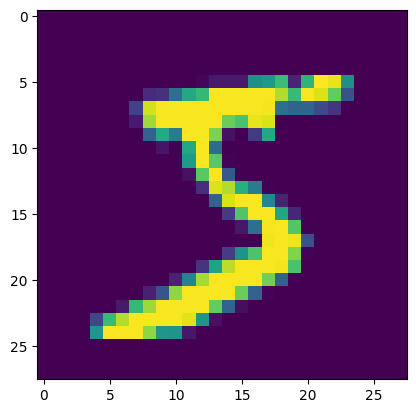

In [65]:
plt.imshow(x_train[0])

In [66]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [67]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [73]:
model = keras.Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = (28,28,1), padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [74]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1568)              0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [75]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 3)

Epoch 1/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2710 - accuracy: 0.9465 - val_loss: 0.0697 - val_accuracy: 0.9767
Epoch 2/3
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0736 - accuracy: 0.9791 - val_loss: 0.0521 - val_accuracy: 0.9826
Epoch 3/3
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0546 - accuracy: 0.9840 - val_loss: 0.0533 - val_accuracy: 0.9844


In [82]:
y_hat = model.predict(x_test[0:10])
y_hat

1/1 [==============================] - 0s 30ms/step


array([[7.8300448e-12, 1.3648961e-10, 2.3469167e-07, 4.7575108e-07,
        1.2010998e-11, 8.0929324e-10, 1.9156431e-15, 9.9999857e-01,
        1.0367681e-08, 6.5020771e-07],
       [3.0386380e-09, 6.3111039e-10, 1.0000000e+00, 3.3837941e-12,
        2.6554117e-13, 2.2002129e-17, 9.7550770e-12, 2.0563890e-14,
        5.3291822e-13, 4.9307232e-15],
       [1.3122320e-06, 9.9984860e-01, 1.2385308e-07, 4.5001033e-07,
        8.7234796e-05, 7.8881458e-06, 2.5963495e-06, 4.2382020e-05,
        9.3813605e-06, 7.0239153e-08],
       [9.9997628e-01, 5.0449728e-11, 4.2417167e-08, 3.6513500e-14,
        2.7137861e-09, 2.6555086e-11, 2.3643941e-05, 1.2099554e-11,
        2.8324482e-10, 2.5868028e-09],
       [8.4017689e-12, 2.3338562e-09, 1.4416274e-14, 1.1703427e-12,
        9.9999988e-01, 7.5396377e-11, 1.0625816e-11, 1.9491199e-10,
        3.7961283e-09, 1.7018625e-07],
       [4.3342876e-09, 9.9987745e-01, 2.4294375e-09, 8.6504845e-11,
        9.5614450e-05, 4.1959485e-08, 3.6392649e-08, 2.26

In [83]:
y_label = np.argmax(y_hat, axis=1)
y_label

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

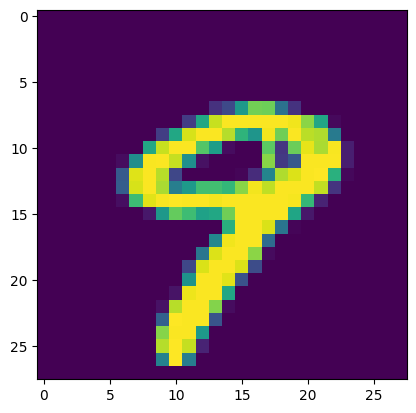

In [94]:
(x_train, y_train), (x_test1, y_test) = mnist.load_data()
plt.imshow(x_test1[9])


In [95]:
model.save("mnist2.hdf5")